Average PnL by Sentiment:
sentiment
Neutral    48.749001
Name: closedpnl, dtype: float64 

Average Leverage by Sentiment:
sentiment
Neutral   NaN
Name: leverage, dtype: float64 

Average Trade Size by Sentiment:
sentiment
Neutral    5639.45121
Name: sizeusd, dtype: float64 

Win Rate by Sentiment:
sentiment
Neutral   NaN
Name: win, dtype: float64 



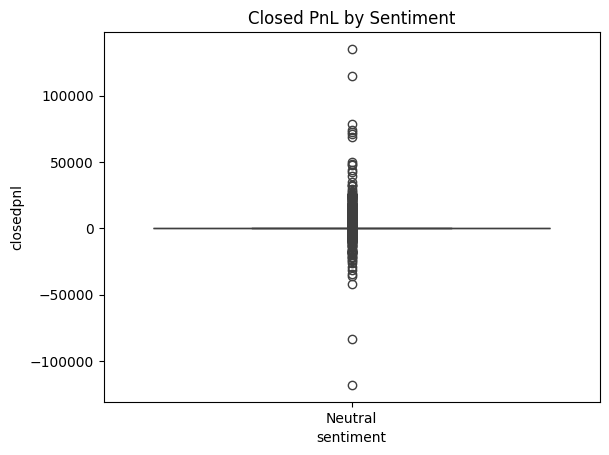

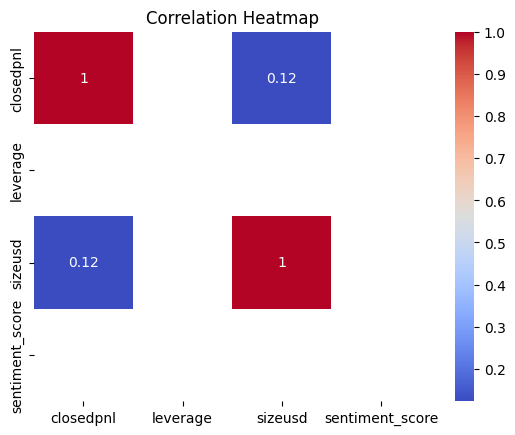

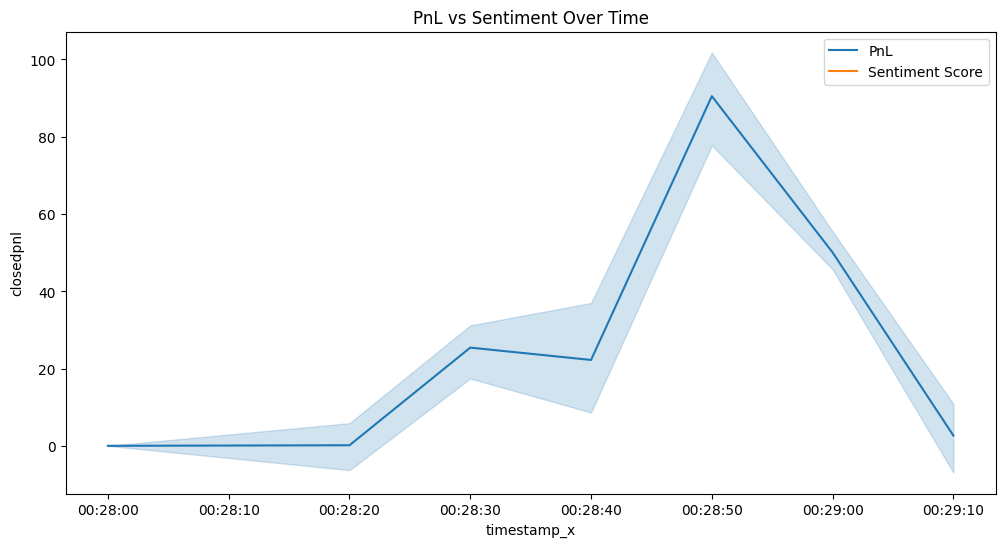

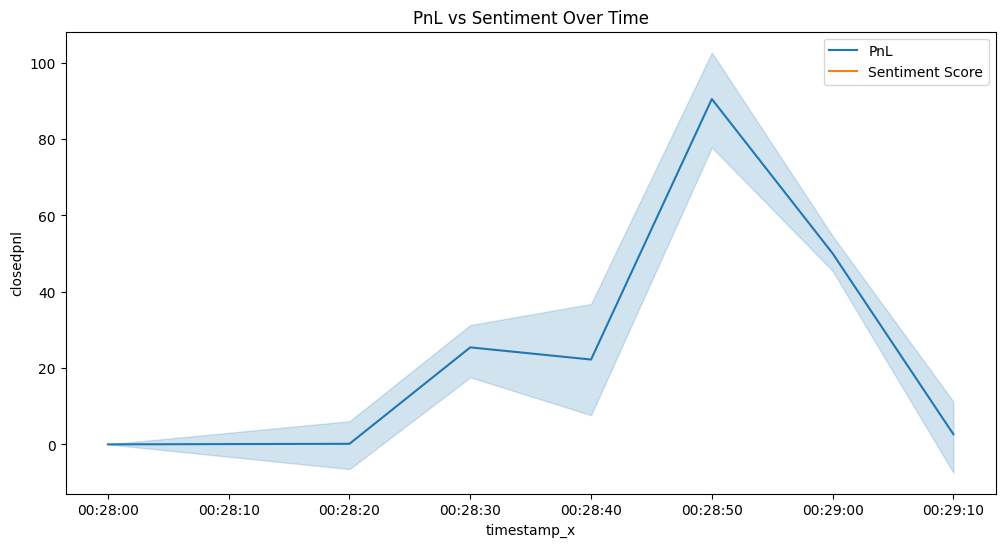

📊 Avg Leverage:
Series([], Name: leverage, dtype: float64) 

📊 Win Rate:
Series([], Name: win, dtype: float64) 

📊 Avg Trade Size (USD):
Series([], Name: sizeusd, dtype: float64) 



C:\Users\91779\AppData\Local\Temp\ipykernel_63232\435824184.py:109: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_pnl, x='sentiment', y='closedpnl', palette='viridis')


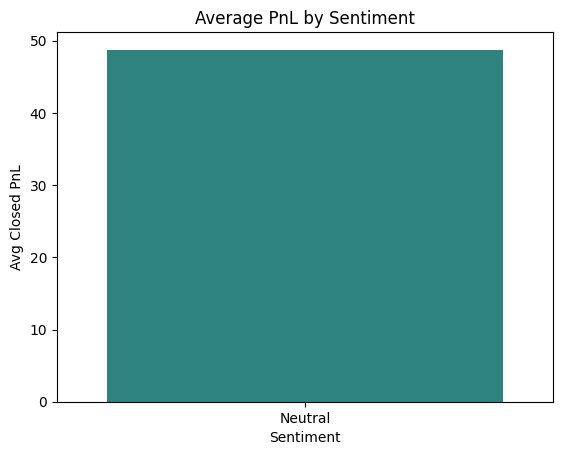

C:\Users\91779\AppData\Local\Temp\ipykernel_63232\435824184.py:115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=merged_df, x='sentiment', palette='pastel')


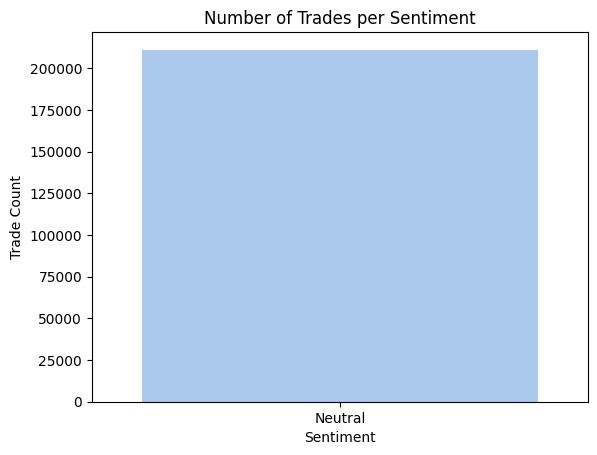


Win Rate (Greed vs Fear):
 Series([], Name: win, dtype: float64)

Avg PnL by Sentiment and Result:
 result          Loss
sentiment           
Neutral    48.749001

Win Rate by Sentiment and Leverage Level:
 sentiment  leverage_level
Neutral    Low              NaN
           High             NaN
Name: win, dtype: float64


C:\Users\91779\AppData\Local\Temp\ipykernel_63232\435824184.py:144: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print("\nWin Rate by Sentiment and Leverage Level:\n", merged_df.groupby(['sentiment', 'leverage_level'])['win'].mean())
c:\Users\91779\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\91779\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


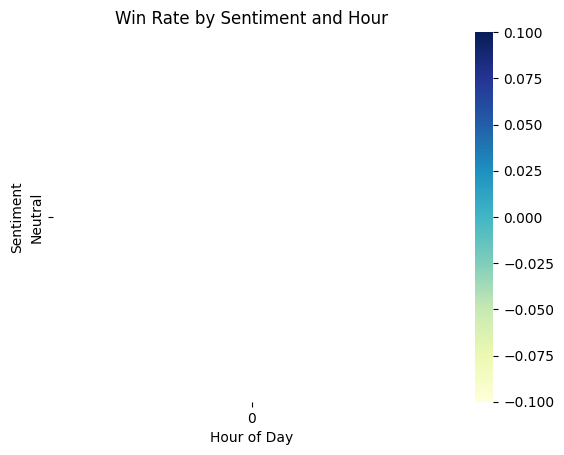


Sample Account Performance by Sentiment:
 sentiment                                      Neutral
account                                               
0x083384f897ee0f19899168e3b1bec365f52a9012  419.127768
0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd    6.577654
0x271b280974205ca63b716753467d5a371de622ab  -18.492043
0x28736f43f1e871e6aa8b1148d38d4994275d72c4    9.951530
0x2c229d22b100a7beb69122eed721cee9b24011dd   52.071011

Avg Loss in Fear: nan

Avg Leverage by Sentiment:
 sentiment
Neutral   NaN
Name: leverage, dtype: float64
📦 Checking model_df requirements:
NaN counts before filtering:
 win                211224
sentiment_score    211224
leverage           211224
sizeusd                 0
hour                    0
dtype: int64
📦 Model dataset size after dropna: (0, 26)
❌ Model data is empty. Fix missing values before training.


In [ ]:
import sys
sys.path.append("../src")

from preprocessing import load_trader_data, load_sentiment_data, clean_trader_data, clean_sentiment_data
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load and clean
trader_df = load_trader_data("../data/historical_data.csv")
sentiment_df = load_sentiment_data("../data/fear_greed_index.csv")

trader_df = clean_trader_data(trader_df)
sentiment_df = clean_sentiment_data(sentiment_df)

# Ensure timestamp is datetime and extract date
trader_df = trader_df.loc[:, ~trader_df.columns.duplicated()]
sentiment_df = clean_sentiment_data(sentiment_df)
trader_df['timestamp'] = pd.to_datetime(trader_df['timestamp'], errors='coerce')
trader_df['date'] = trader_df['timestamp'].dt.date
sentiment_df['date'] = sentiment_df['date'].dt.date

# Merge datasets
merged_df = pd.merge(trader_df, sentiment_df, on='date', how='left')
merged_df.rename(columns={'value': 'sentiment_score'}, inplace=True)

# Add sentiment labels
def sentiment_label(score):
    if score >= 60:
        return 'Greed'
    elif score <= 40:
        return 'Fear'
    else:
        return 'Neutral'

merged_df['sentiment'] = merged_df['sentiment_score'].apply(sentiment_label)

# Fix column names if needed (based on your actual CSV)
merged_df.columns = merged_df.columns.str.strip().str.replace(" ", "").str.lower()

# Convert types
merged_df['closedpnl'] = pd.to_numeric(merged_df.get('closedpnl'), errors='coerce')
merged_df['sizeusd'] = pd.to_numeric(merged_df.get('sizeusd'), errors='coerce')
merged_df['leverage'] = pd.to_numeric(merged_df.get('leverage'), errors='coerce')
merged_df['win'] = pd.to_numeric(merged_df.get('win'), errors='coerce')

# Grouped metrics
grouped = merged_df.groupby('sentiment')
print("Average PnL by Sentiment:")
print(grouped['closedpnl'].mean(), "\n")

print("Average Leverage by Sentiment:")
print(grouped['leverage'].mean(), "\n")

print("Average Trade Size by Sentiment:")
print(grouped['sizeusd'].mean(), "\n")

print("Win Rate by Sentiment:")
print(grouped['win'].mean(), "\n")

# Visualizations
sns.boxplot(data=merged_df, x='sentiment', y='closedpnl')
plt.title("Closed PnL by Sentiment")
plt.show()

sns.heatmap(merged_df[['closedpnl', 'leverage', 'sizeusd', 'sentiment_score']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

merged_df.sort_values('timestamp_x', inplace=True)

plt.figure(figsize=(12,6))
sns.lineplot(x='timestamp_x', y='closedpnl', data=merged_df, label='PnL')
sns.lineplot(x='timestamp_x', y='sentiment_score', data=merged_df, label='Sentiment Score')  
plt.title("PnL vs Sentiment Over Time")
plt.legend()
plt.show()


plt.figure(figsize=(12,6))
sns.lineplot(x='timestamp_x', y='closedpnl', data=merged_df, label='PnL')
sns.lineplot(x='timestamp_x', y='sentiment_score', data=merged_df, label='Sentiment Score')
plt.title("PnL vs Sentiment Over Time")
plt.legend()
plt.show()


# Filter for only Fear and Greed
filtered = merged_df[merged_df['sentiment'].isin(['Fear', 'Greed'])]

# Group by sentiment
grouped_filtered = filtered.groupby('sentiment')

print(" Avg Leverage:")
print(grouped_filtered['leverage'].mean(), "\n")

print(" Win Rate:")
print(grouped_filtered['win'].mean(), "\n")

print(" Avg Trade Size (USD):")
print(grouped_filtered['sizeusd'].mean(), "\n")


avg_pnl = merged_df.groupby('sentiment')['closedpnl'].mean().reset_index()

sns.barplot(data=avg_pnl, x='sentiment', y='closedpnl', palette='viridis')
plt.title("Average PnL by Sentiment")
plt.ylabel("Avg Closed PnL")
plt.xlabel("Sentiment")
plt.show()

sns.countplot(data=merged_df, x='sentiment', palette='pastel')
plt.title("Number of Trades per Sentiment")
plt.ylabel("Trade Count")
plt.xlabel("Sentiment")
plt.show()

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# === Sentiment vs Performance ===

filtered = merged_df[merged_df['sentiment'].isin(['Greed', 'Fear'])]
print("\nWin Rate (Greed vs Fear):\n", filtered.groupby('sentiment')['win'].mean())


def classify_result(row):
    return 'Win' if row['win'] == 1 else 'Loss'

merged_df['result'] = merged_df.apply(classify_result, axis=1)
result_group = merged_df.groupby(['sentiment', 'result'])['closedpnl'].mean().unstack()
print("\nAvg PnL by Sentiment and Result:\n", result_group)

merged_df['leverage_level'] = pd.cut(merged_df['leverage'], bins=[0, 5, 100], labels=['Low', 'High'])
print("\nWin Rate by Sentiment and Leverage Level:\n", merged_df.groupby(['sentiment', 'leverage_level'])['win'].mean())


merged_df['hour'] = pd.to_datetime(merged_df['timestamp_x'], errors='coerce').dt.hour
hourly_win_rate = merged_df.groupby(['sentiment', 'hour'])['win'].mean().unstack()
sns.heatmap(hourly_win_rate, cmap="YlGnBu")
plt.title("Win Rate by Sentiment and Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Sentiment")
plt.show()


account_perf = merged_df.groupby(['account', 'sentiment'])['closedpnl'].mean().unstack()
print("\nSample Account Performance by Sentiment:\n", account_perf.head())


trade_counts = merged_df.groupby(['account', 'sentiment']).size().unstack().fillna(0)
if 'Greed' in trade_counts.columns:
    print("\nTop Overtrading Accounts in Greed:\n", trade_counts.sort_values(by='Greed', ascending=False).head())


fear_losses = merged_df[(merged_df['sentiment'] == 'Fear') & (merged_df['win'] == 0)]
print("\nAvg Loss in Fear:", fear_losses['closedpnl'].mean())


leverage_stats = merged_df.groupby('sentiment')['leverage'].mean()
print("\nAvg Leverage by Sentiment:\n", leverage_stats)


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


if 'timestamp_x' in merged_df.columns:
    merged_df['hour'] = pd.to_datetime(merged_df['timestamp_x'], errors='coerce').dt.hour
else:
    print(" 'timestamp_x' not found in merged_df")


print(" Checking model_df requirements:")
print("NaN counts before filtering:\n", merged_df[['win', 'sentiment_score', 'leverage', 'sizeusd', 'hour']].isnull().sum())

model_df = merged_df.dropna(subset=['win', 'sentiment_score', 'leverage', 'sizeusd', 'hour'])
print(" Model dataset size after dropna:", model_df.shape)


if model_df.empty:
    print(" Model data is empty. Fix missing values before training.")
else:
    X = model_df[['sentiment_score', 'leverage', 'sizeusd', 'hour']]
    y = model_df['win']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(classification_report(y_test, y_pred))




Win Rate (Greed vs Fear):
 Series([], Name: win, dtype: float64)

Avg PnL by Sentiment and Result:
 result          Loss
sentiment           
Neutral    48.749001

Win Rate by Sentiment and Leverage Level:
 sentiment  leverage_level
Neutral    Low              NaN
           High             NaN
Name: win, dtype: float64


C:\Users\91779\AppData\Local\Temp\ipykernel_63232\3650887356.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print("\nWin Rate by Sentiment and Leverage Level:\n", merged_df.groupby(['sentiment', 'leverage_level'])['win'].mean())
c:\Users\91779\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\91779\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


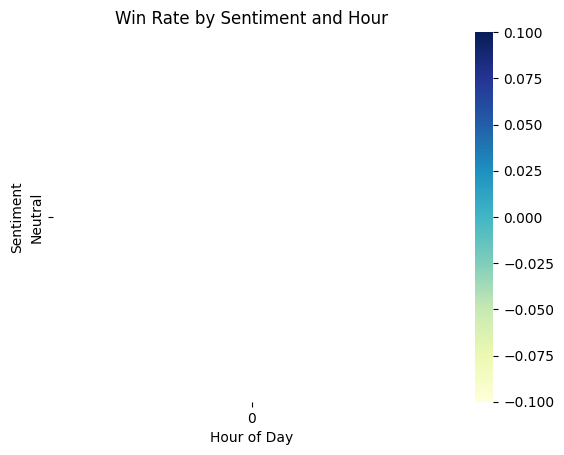


Sample Account Performance by Sentiment:
 sentiment                                      Neutral
account                                               
0x083384f897ee0f19899168e3b1bec365f52a9012  419.127768
0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd    6.577654
0x271b280974205ca63b716753467d5a371de622ab  -18.492043
0x28736f43f1e871e6aa8b1148d38d4994275d72c4    9.951530
0x2c229d22b100a7beb69122eed721cee9b24011dd   52.071011

Avg Loss in Fear: nan

Avg Leverage by Sentiment:
 sentiment
Neutral   NaN
Name: leverage, dtype: float64
📦 Checking model_df requirements:
NaN counts before filtering:
 win                211224
sentiment_score    211224
leverage           211224
sizeusd                 0
hour                    0
dtype: int64
📦 Model dataset size after dropna: (0, 26)
❌ Model data is empty. Fix missing values before training.


In [ ]:
# ✅ Extend Phase 2 code into PHASE 3: Insight Generation

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# === 6. Sentiment vs Performance ===

# ✅ Win rate in “Greed” vs “Fear”
filtered = merged_df[merged_df['sentiment'].isin(['Greed', 'Fear'])]
print("\nWin Rate (Greed vs Fear):\n", filtered.groupby('sentiment')['win'].mean())

# ✅ Avg loss vs win size by sentiment
def classify_result(row):
    return 'Win' if row['win'] == 1 else 'Loss'

merged_df['result'] = merged_df.apply(classify_result, axis=1)
result_group = merged_df.groupby(['sentiment', 'result'])['closedpnl'].mean().unstack()
print("\nAvg PnL by Sentiment and Result:\n", result_group)

# ✅ Segment by leverage level
merged_df['leverage_level'] = pd.cut(merged_df['leverage'], bins=[0, 5, 100], labels=['Low', 'High'])
print("\nWin Rate by Sentiment and Leverage Level:\n", merged_df.groupby(['sentiment', 'leverage_level'])['win'].mean())

# ✅ Segment by hour of day
merged_df['hour'] = pd.to_datetime(merged_df['timestamp_x'], errors='coerce').dt.hour
hourly_win_rate = merged_df.groupby(['sentiment', 'hour'])['win'].mean().unstack()
sns.heatmap(hourly_win_rate, cmap="YlGnBu")
plt.title("Win Rate by Sentiment and Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Sentiment")
plt.show()

# ✅ Segment by Account ID
account_perf = merged_df.groupby(['account', 'sentiment'])['closedpnl'].mean().unstack()
print("\nSample Account Performance by Sentiment:\n", account_perf.head())

# === 7. Behavioral Patterns ===

# ✅ Overtrading in Greed?
trade_counts = merged_df.groupby(['account', 'sentiment']).size().unstack().fillna(0)
if 'Greed' in trade_counts.columns:
    print("\nTop Overtrading Accounts in Greed:\n", trade_counts.sort_values(by='Greed', ascending=False).head())

# ✅ Larger losses during Fear?
fear_losses = merged_df[(merged_df['sentiment'] == 'Fear') & (merged_df['win'] == 0)]
print("\nAvg Loss in Fear:", fear_losses['closedpnl'].mean())

# ✅ Riskier leverage in Greed?
leverage_stats = merged_df.groupby('sentiment')['leverage'].mean()
print("\nAvg Leverage by Sentiment:\n", leverage_stats)

# === 8. Optional: Modeling ===
# --- Optional Modeling ---
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# ✅ Ensure timestamp_x exists and extract hour
if 'timestamp_x' in merged_df.columns:
    merged_df['hour'] = pd.to_datetime(merged_df['timestamp_x'], errors='coerce').dt.hour
else:
    print("⚠️ 'timestamp_x' not found in merged_df")

# ✅ Check NaNs before filtering
print("📦 Checking model_df requirements:")
print("NaN counts before filtering:\n", merged_df[['win', 'sentiment_score', 'leverage', 'sizeusd', 'hour']].isnull().sum())

# ✅ Prepare model data
model_df = merged_df.dropna(subset=['win', 'sentiment_score', 'leverage', 'sizeusd', 'hour'])
print("📦 Model dataset size after dropna:", model_df.shape)

# 🚨 Abort if model_df is empty
if model_df.empty:
    print("❌ Model data is empty. Fix missing values before training.")
else:
    X = model_df[['sentiment_score', 'leverage', 'sizeusd', 'hour']]
    y = model_df['win']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(classification_report(y_test, y_pred))

In [4]:
print("✅ Shape of model_df:", model_df.shape)
print("✅ Missing values:\n", model_df[['win', 'sentiment_score', 'leverage', 'sizeusd', 'hour']].isnull().sum())

✅ Shape of model_df: (0, 26)
✅ Missing values:
 win                0
sentiment_score    0
leverage           0
sizeusd            0
hour               0
dtype: int64
